Test 3D richtig erstellt + orientierung usw


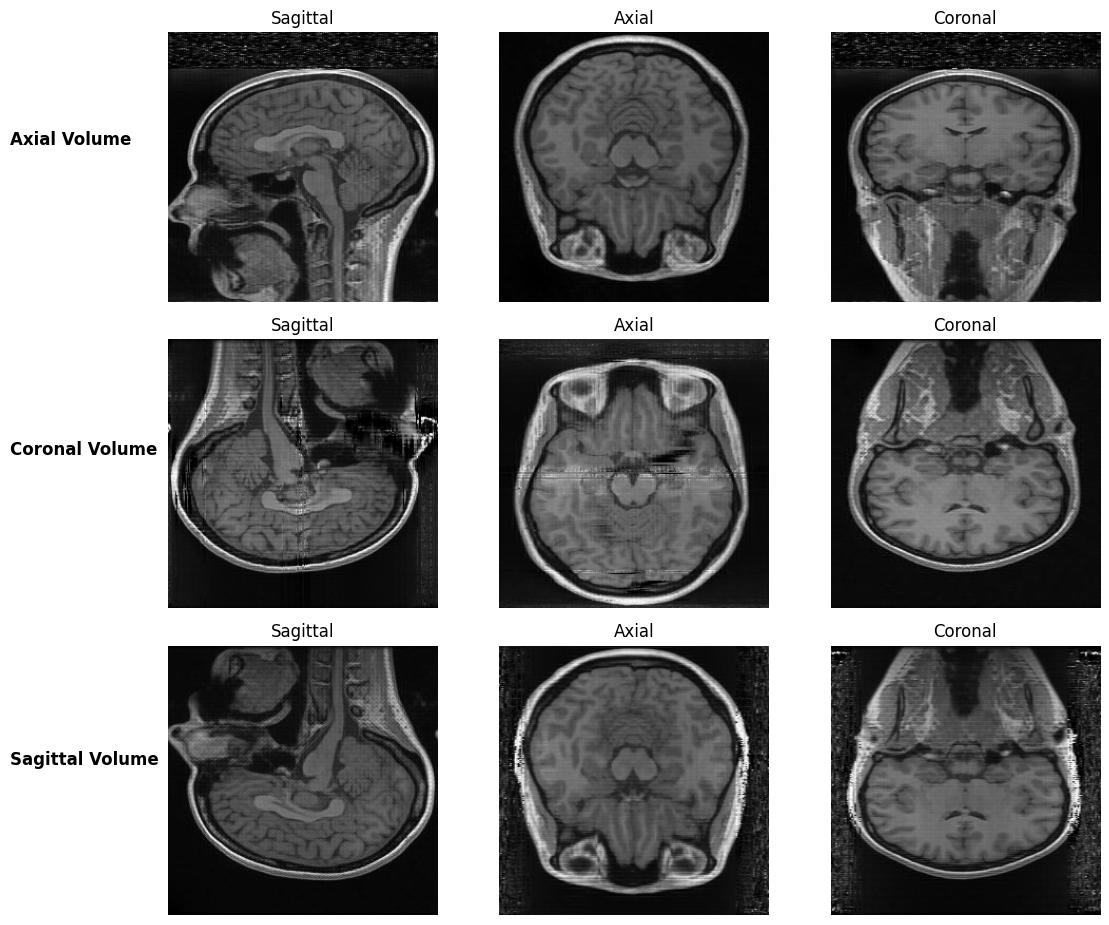

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

volume_paths = [
    "gehirn3axial.npy",
    "gehirn3coronal.npy",
    "gehirn3sagumsortiert.npy"
]

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle("", fontsize=16)

# Zeilenbeschriftungen hinzufügen
row_labels = ["Axial Volume", "Coronal Volume", "Sagittal Volume"]
for row, label in enumerate(row_labels):
    fig.text(
        x=0.04,                     
        y=0.79 - row * 0.31,        
        s=label,
        va="center",
        ha="left",
        fontsize=12,
        fontweight="bold"
    )

for row, path in enumerate(volume_paths):
    volume = np.load(path)

    sagittal_slice = volume[volume.shape[0] // 2, :, :]
    axial_slice = volume[:, :, volume.shape[2] // 2]
    coronal_slice = volume[:, volume.shape[1] // 2, :]

    axes[row, 0].imshow(sagittal_slice.T, cmap="gray", origin="lower")
    axes[row, 0].set_title("Sagittal")

    axes[row, 1].imshow(axial_slice.T, cmap="gray", origin="lower")
    axes[row, 1].set_title("Axial")

    axes[row, 2].imshow(coronal_slice.T, cmap="gray", origin="lower")
    axes[row, 2].set_title("Coronal")

for ax in axes.flat:
    ax.axis("off")

plt.tight_layout(rect=[0.12, 0, 1, 0.95])
plt.show()


Volume shape: (256, 256, 256)


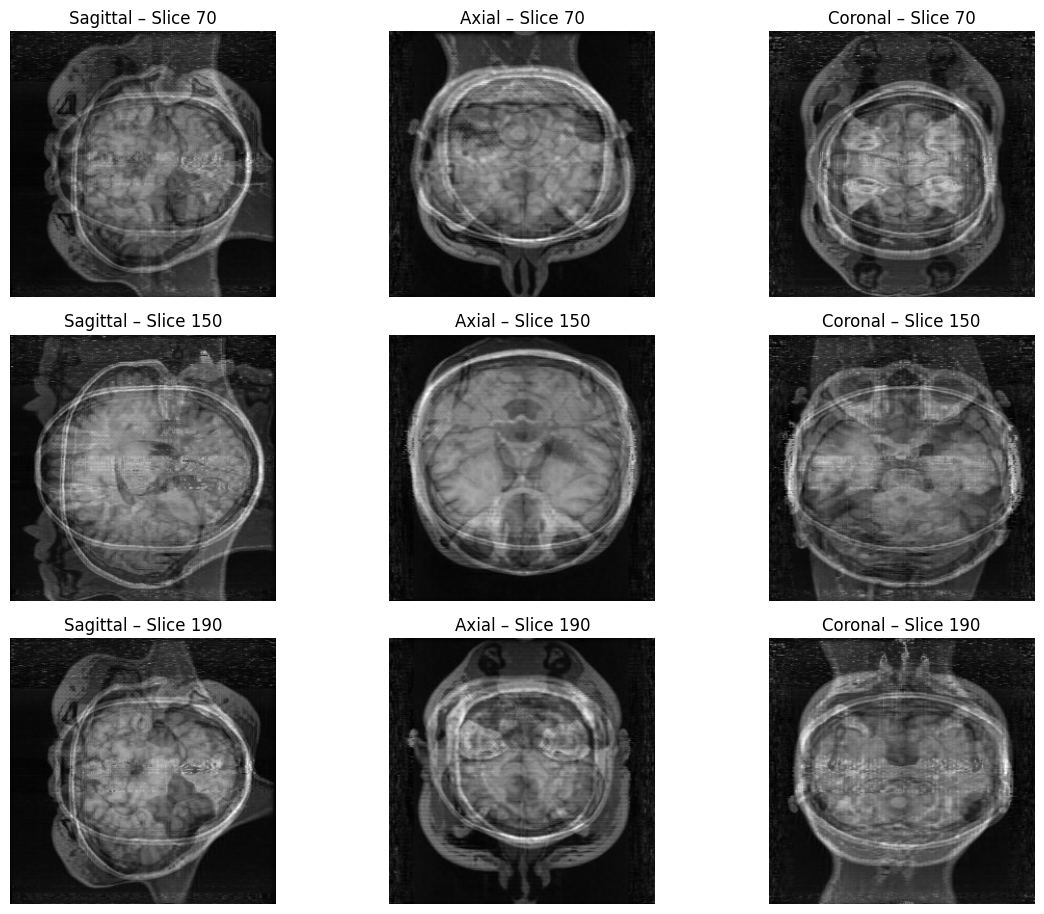

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

volume_path = "gehirn1meanfused.npy"
volume = np.load(volume_path)

#für slices an versch Positionen
slices = [70, 150, 190]

depth, height, width = volume.shape
print(f"Volume shape: {volume.shape}")

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle(f"", fontsize=16)

for row, idx in enumerate(slices):
    if idx >= depth or idx >= height or idx >= width:
        raise ValueError(f"Index {idx} überschreitet die Dimension des Volumens.")

    sagittal = volume[idx, :, :]
    axial = volume[:, :, idx]
    coronal = volume[:, idx, :]

    axes[row, 0].imshow(sagittal.T, cmap="gray", origin="lower")
    axes[row, 0].set_title(f"Sagittal – Slice {idx}")
    axes[row, 0].axis("off")

    axes[row, 1].imshow(axial.T, cmap="gray", origin="lower")
    axes[row, 1].set_title(f"Axial – Slice {idx}")
    axes[row, 1].axis("off")

    axes[row, 2].imshow(coronal.T, cmap="gray", origin="lower")
    axes[row, 2].set_title(f"Coronal – Slice {idx}")
    axes[row, 2].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


In [ ]:
#auf sagittale kein transpose anwenden
#durch alle .npy im ordner axial>volumes
import os
import numpy as np
from pathlib import Path

folder_path = Path("C:/Users/LaraR/OneDrive/Desktop/Projekt_MRI/sorted_val_2/val_processed/coronal/volumes") #coronal

for filename in os.listdir(folder_path):
    if filename.endswith(".npy"):
        file_path = os.path.join(folder_path, filename)

        volume = np.load(file_path)

        volume_sag = np.transpose(volume, (2, 0, 1))  # (W, Z, H) coronal -> sagittal
        #volume_sag = np.transpose(volume, (2, 1, 0))  # (W, H, Z) axial -> sagittal
        #volume_sag = np.transpose(volume, (0, 2, 1)) #flip entlang y achse

        np.save(file_path, volume_sag)

        print(f"Transponiert und gespeichert: {filename} | Neue Form: {volume_sag.shape}")



Transponiert und gespeichert: gehirn1.npy | Neue Form: (256, 256, 256)
Transponiert und gespeichert: gehirn10.npy | Neue Form: (256, 256, 256)
Transponiert und gespeichert: gehirn2.npy | Neue Form: (256, 256, 256)
Transponiert und gespeichert: gehirn3.npy | Neue Form: (256, 256, 256)
Transponiert und gespeichert: gehirn4.npy | Neue Form: (256, 256, 256)
Transponiert und gespeichert: gehirn5.npy | Neue Form: (256, 256, 256)
Transponiert und gespeichert: gehirn6.npy | Neue Form: (256, 256, 256)
Transponiert und gespeichert: gehirn7.npy | Neue Form: (256, 256, 256)
Transponiert und gespeichert: gehirn8.npy | Neue Form: (256, 256, 256)
Transponiert und gespeichert: gehirn9.npy | Neue Form: (256, 256, 256)


Volumenform: (256, 256, 256)


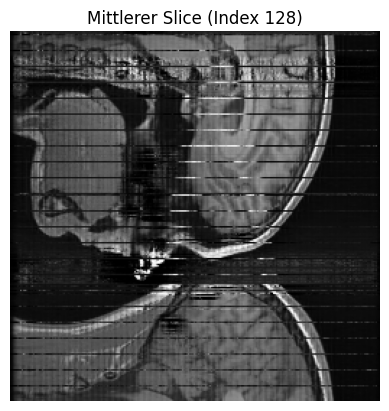

In [ ]:
print("Volumenform:", volume.shape)

middle_index = volume.shape[0] // 2
middle_slice = volume[middle_index, :, :]  

plt.imshow(middle_slice, cmap='gray')
plt.title(f"Mittlerer Slice (Index {middle_index})")
plt.axis('off')
plt.show()
